# BTS Mental Art
## Most cells from ITU DATA MINING

In [1]:
import pandas as pd
import numpy as np
pd.__version__

'1.5.1'

## Numpy introduction =======

Numpy is a powerful scientific computing library. The fundmental object is the (n-dimensional) numpy array and the library provides a collection of tools for working with such arrays. If you are already familiar with MATLAB you might find this [tutorial](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) useful. 

The following Numpy introduction is largely based on this [tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy).

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a [tuple](http://www.tutorialspoint.com/python/python_tuples.htm) of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension. *N.B. this use of the word 'rank' is not the same as the meaning in linear algebra.*

We can initialize numpy arrays from nested Python [lists](http://www.tutorialspoint.com/python/python_lists.htm), and access elements using square brackets:

In [2]:
import numpy as np
a = np.array([1, 2, 3])  # Creates a rank 1 array (i.e. vector)
a

array([1, 2, 3])

In [3]:
type(a)  # Prints the type of object a (array)

numpy.ndarray

In [4]:
a.shape  # Prints the number of elements for each dimension

(3,)

In [5]:
print(a[0], a[1], a[2], a[-1], a[-2], a[-3])  # Select array elements by index (starts at 0)

1 2 3 3 2 1


In [6]:
try:
    a[3]  # Will error
except IndexError as e:
    print('{}'.format(e))
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

index 3 is out of bounds for axis 0 with size 3


In [7]:
a[0] = 4  # Change an element of the array

In [8]:
a

array([4, 2, 3])

In [9]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
b

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
b.shape

(2, 3)

In [11]:
print(b[0, 0], b[0, 1], b[1, 0])

1 2 4


### Creating arrays

We have many options here:

#### Set matrix types

Generally the first argument is simply the shape of the resulting array

In [12]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [13]:
np.ones((1, 2))

array([[1., 1.]])

In [14]:
np.full((2, 2), 7)

array([[7, 7],
       [7, 7]])

In [15]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [16]:
np.random.random((2, 2))

array([[0.40712193, 0.83683178],
       [0.5411423 , 0.41661154]])

In [17]:
mu = 2
sigma = .2
np.random.normal(mu, sigma, (4,1)), np.random.normal(mu, sigma, 10)

(array([[2.25523622],
        [2.24806174],
        [1.91957799],
        [2.04805979]]),
 array([1.78238277, 2.13323043, 2.21989732, 1.87302352, 1.75718622,
        2.03990999, 1.84399337, 1.82329164, 1.76428902, 2.53117164]))

#### From a list

In [18]:
some_list = [1, 4, 6, 8]
e = np.array(some_list)
e

array([1, 4, 6, 8])

In [19]:
some_list = [[1, 4, 6, 8], [2, 2, 4, 4]]
f = np.array(some_list, dtype=float)
f

array([[1., 4., 6., 8.],
       [2., 2., 4., 4.]])

#### Appending an existing array

In [20]:
g = np.array([])
for ii in range(10):
    g = np.append(g, ii)
g

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Be careful with types though, numpy will do some inference on your behalf...it may not be what you want/intended.

In [21]:
np.append(g, 'hello')

array(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', 'hello'], dtype='<U32')

In [22]:
e.dtype

dtype('int64')

In [23]:
np.append(e, 2.0)

array([1., 4., 6., 8., 2.])

In [24]:
np.append(e, 2.0).dtype

dtype('float64')

### Array indexing

Slicing is the most common way to index arrays. This works in a similar way to indexing python lists. 

There are also other options, such as integer and boolean array indexing.

In [25]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [26]:
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

In [27]:
a[0, 1]

2

A slice of an array is a view into the same data, so modifying it will modify the original array. For example: b[0, 0] is the same piece of data as a[0, 1]. Modifying b will modify a.

In [28]:
b[0, 0] = 77
a[0, 1]

77

In [29]:
a

array([[ 1, 77,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

We can also index particular entries based on some function, which we generally call masking. For example, we may want to zero out all even entries. To do so, we can do the following:

In [30]:
filter_ = a%2 == 0

In [31]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) # Reinitialise a
a[a%2 == 0] = 0
a

array([[ 1,  0,  3,  0],
       [ 5,  0,  7,  0],
       [ 9,  0, 11,  0]])

Basically, the above can be interpeted as follows: ```a%2 == 0``` creates a boolean matrix of the same size as a where the entries are True/False depending on whether the corresponding entry in a is even or false (% is the modulus operator). Let us call this ```a_index```. Then we use this to index into the original a by ```a[a_index]``` and setting all such entries to 0. If we know the size of the indexing, then we can also do something more fancy such as:

In [32]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]], dtype=float) # Reinitialise a (enforce type float: see below)
a[a%2 == 0] = np.random.random((6))
a

array([[ 1.        ,  0.61156589,  3.        ,  0.34567766],
       [ 5.        ,  0.01450418,  7.        ,  0.74977993],
       [ 9.        ,  0.54956394, 11.        ,  0.87820919]])

Going back to the issue of views. Note that b still points to the original matrix a and not the ones we just created: i.e. when we reassigned a to the new values, (```a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])```), we are only changing where a points... b still points to the original data.

In [33]:
b

array([[77,  3],
       [ 6,  7]])

### Array datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [34]:
x = np.array([1, 2])  # Let numpy choose the datatype
x.dtype

dtype('int64')

In [35]:
x = np.array([1.0, 2.0])  # Let numpy choose the datatype
x.dtype

dtype('float64')

In [36]:
x = np.array([1, 2], dtype=np.int64)  # Force a particular datatype
x.dtype

dtype('int64')

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [37]:
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
x

array([[1., 2.],
       [3., 4.]])

In [38]:
y = np.array([[5, 6], [7, 8]], dtype=np.float64)
y

array([[5., 6.],
       [7., 8.]])

#### Elementwise sum, equivalent expressions:

In [39]:
x + y

array([[ 6.,  8.],
       [10., 12.]])

In [40]:
np.add(x, y)

array([[ 6.,  8.],
       [10., 12.]])

#### Elementwise difference, equivalent expressions:

In [41]:
x - y

array([[-4., -4.],
       [-4., -4.]])

In [42]:
np.subtract(x, y)

array([[-4., -4.],
       [-4., -4.]])

#### Elementwise product, equivalent expressions:

In [43]:
x * y

array([[ 5., 12.],
       [21., 32.]])

In [44]:
np.multiply(x, y)

array([[ 5., 12.],
       [21., 32.]])

#### Elementwise division, equivalent expressions:

In [45]:
x / y

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

In [46]:
np.divide(x, y)

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

#### Elementwise square root

In [47]:
np.sqrt(x)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

#### Dot product and matrix multiplicaiton

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the `np.dot` function or `.dot` method to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [48]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
v = np.array([9, 10])
w = np.array([11, 12])

In [49]:
w

array([11, 12])

##### Inner product of vectors

In [50]:
np.dot(v, w)

219

##### Matrix vector product

In [51]:
x.dot(v)  # using x's method

array([29, 67])

In [52]:
np.dot(x, v)  # using the numpy function

array([29, 67])

In [53]:
x

array([[1, 2],
       [3, 4]])

In [54]:
y

array([[5, 6],
       [7, 8]])

##### Matrix matrix product

In [55]:
x.dot(y)  # using x's method

array([[19, 22],
       [43, 50]])

In [56]:
np.dot(x, y)  # using the numpy function

array([[19, 22],
       [43, 50]])

### Mathematical functions

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [57]:
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

In [58]:
np.sum(x)  # Compute sum of all elements

10

In [59]:
np.sum(x, axis=0)  # Compute sum of each column - sum *over rows* i.e. dimension 0

array([4, 6])

In [60]:
np.sum(x, axis=1)  # Compute sum of each row - sum *over columns* i.e. dimension 1

array([3, 7])

You can find the full list of mathematical functions provided by numpy in the [documentation](https://numpy.org/doc/stable/reference/routines.math.html).


Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [61]:
x = np.arange(4)
x.shape
x

array([0, 1, 2, 3])

In [62]:
x = x.reshape((2, 2))

In [63]:
x.T

array([[0, 2],
       [1, 3]])

In [64]:
np.transpose(x) # Equivalent expression

array([[0, 2],
       [1, 3]])

In [65]:
# Note that taking the transpose of a rank 1 array (a vector) does nothing:
v = np.array([1, 2, 3])
v

array([1, 2, 3])

In [66]:
v.T

array([1, 2, 3])

In [67]:
x

array([[0, 1],
       [2, 3]])

In [68]:
x.reshape((4, 1))

array([[0],
       [1],
       [2],
       [3]])

In [69]:
x.reshape((4,))

array([0, 1, 2, 3])

In [70]:
y = np.arange(27).reshape(3,3,3)
y

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [71]:
y[0]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [72]:
y.shape

(3, 3, 3)

In [73]:
y.reshape((3, -1))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26]])

In [74]:
y.reshape((3, -1)).shape

(3, 9)

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. 

In [75]:
x = np.arange(12).reshape((4, 3))
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [76]:
v = np.array([1, 0, 1])
v

array([1, 0, 1])

In [77]:
x + v  # Add v to each row of x using broadcasting

array([[ 1,  1,  3],
       [ 4,  4,  6],
       [ 7,  7,  9],
       [10, 10, 12]])

`x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

* If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
* The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
* The arrays can be broadcast together if they are compatible in all dimensions.
* After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
* In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension.

So be careful with shapes...

In [78]:
y = x.T
y

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

In [79]:
try:
    y + v  # Add v to each column of y using broadcasting...?
except ValueError as e:
    print(e)
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

operands could not be broadcast together with shapes (3,4) (3,) 


And especially careful with vectors!

In [80]:
try:
    y + v.T  # Add v to each column of y using broadcasting...?
except ValueError as e:
    print(e)
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

operands could not be broadcast together with shapes (3,4) (3,) 


In [81]:
y + v.reshape((3, 1))  # Add v to each column of y using broadcasting!

array([[ 1,  4,  7, 10],
       [ 1,  4,  7, 10],
       [ 3,  6,  9, 12]])

In [82]:
print('x shape:', x.shape)
print('v shape:', v.shape)
print('y shape:', y.shape)

x shape: (4, 3)
v shape: (3,)
y shape: (3, 4)


### Numpy documentation

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](https://numpy.org/doc/stable/reference/index.html) to find out much more about numpy.

## Part 1: The Pandas DataFrame Object


*   The pandas DataFrame object is the commonly used structure to deal with data.
*   You can also use Numpy Array but, it has some limitations about flexibility (working with missin values, attaching labels to data). Instead, Pandas Dataframe tool allow us to deal with data with its useful functions.

In [83]:
review = {
    "user_id": "U1",
    "item_id": "I5",
    "rating": 5,
    "review_text": "The best product ever",
    "email": "U1@gmail.com"
}

review = {
    "user_id": ["U1"],
    "item_id": ["I5"],
    "rating": [5],
    "review_text": ["The best product ever"],
    "email": ["U1@gmail.com"]
}

review = {
    "user_id": ["U1", "U2", "U3", "U4"],
    "item_id": ["I5", "I2", "I1", "I1"],
    "rating": [5, 1, 4, 5],
    "review_text": ["The best product ever", "Too expensive", "Like it", "Yey"],
    "email": ["U1@gmail.com", "U2@gmail.com", "U3@gmail.com", "U4@gmail.com"]
}

In [84]:
review["review_text"]

['The best product ever', 'Too expensive', 'Like it', 'Yey']

In [85]:
# Create Pandas DataFrame
df_review = pd.DataFrame(review)
df_review.head()

,user_id,item_id,rating,review_text,email
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com
2,U3,I1,4,Like it,U3@gmail.com
3,U4,I1,5,Yey,U4@gmail.com


In [86]:
df_review.head()

,user_id,item_id,rating,review_text,email
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com
2,U3,I1,4,Like it,U3@gmail.com
3,U4,I1,5,Yey,U4@gmail.com


In [87]:
# Access dataframe values
df_review["review_text"]

# We can use below format to access a column but some problems might be occured according to the naming of the column
# df_review.review_text

0    The best product ever
1            Too expensive
2                  Like it
3                      Yey
Name: review_text, dtype: object

In [88]:
# Check type of column
type(df_review["review_text"])

pandas.core.series.Series

In [89]:
# Access multiple columns using two brackets
df_review[["rating", "review_text"]]

,rating,review_text
0,5,The best product ever
1,1,Too expensive
2,4,Like it
3,5,Yey


In [90]:
# List all columns
df_review.columns

Index(['user_id', 'item_id', 'rating', 'review_text', 'email'], dtype='object')

## Part 2: Selecting using Index
*   iloc : integer location
*   loc : searches by label

### Selecting by iloc

In [91]:
df_review

,user_id,item_id,rating,review_text,email
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com
2,U3,I1,4,Like it,U3@gmail.com
3,U4,I1,5,Yey,U4@gmail.com


In [92]:
# Access row with the index 0
df_review.iloc[0]

user_id                           U1
item_id                           I5
rating                             5
review_text    The best product ever
email                   U1@gmail.com
Name: 0, dtype: object

In [93]:
# Acess multiple rows with index 0 and 1
df_review.iloc[[0,1]]

,user_id,item_id,rating,review_text,email
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com


In [94]:
# Select rows and only one column
df_review.iloc[[0,1], 2]

0    5
1    1
Name: rating, dtype: int64

In [95]:
# Select rows and columns
df_review.iloc[[0,1], [2,3]]

,rating,review_text
0,5,The best product ever
1,1,Too expensive


### Selecting by loc

In [96]:
df_review

,user_id,item_id,rating,review_text,email
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com
2,U3,I1,4,Like it,U3@gmail.com
3,U4,I1,5,Yey,U4@gmail.com


In [97]:
df_review.loc[0]

user_id                           U1
item_id                           I5
rating                             5
review_text    The best product ever
email                   U1@gmail.com
Name: 0, dtype: object

In [98]:
df_review.loc[[0,1]]

,user_id,item_id,rating,review_text,email
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com


In [99]:
df_review.iloc[[0,1],2]

0    5
1    1
Name: rating, dtype: int64

In [100]:
df_review.loc[[0,1], "rating"]

0    5
1    1
Name: rating, dtype: int64

In [101]:
df_review.loc[[0,1], ["rating", "review_text"]]

,rating,review_text
0,5,The best product ever
1,1,Too expensive


## Part 3: Indexes
*   Read Dataset & Basic DF methods
*   Set Index
*   Read Dataset by setting Index

Read Dataset & Basic DF Methods

In [102]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

In [103]:
# Run the cell if you're using Google Colab, otherwise comment it
#from google.colab import drive
#drive.mount('/content/drive')

In [104]:
# Write your own path
#path = "content/drive/My Drive/credit_score.csv"
path2 = r"credit_score.csv"

In [105]:
df = pd.read_csv(path2)

/var/folders/7d/xjcyvs_53yn5mxdw4238pf8w0000gn/T/ipykernel_79481/1294646402.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path2)


In [106]:
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [107]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [108]:
df.tail(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [109]:
# How many columns and rows
df.shape

(100000, 28)

In [110]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [111]:
df["Occupation"]

0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: object

In [112]:
df["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Indexes

In [113]:
df.loc[0]

ID                                                                     0x1602
Customer_ID                                                         CUS_0xd40
Month                                                                 January
Name                                                            Aaron Maashoh
Age                                                                        23
SSN                                                               821-00-0265
Occupation                                                          Scientist
Annual_Income                                                        19114.12
Monthly_Inhand_Salary                                             1824.843333
Num_Bank_Accounts                                                           3
Num_Credit_Card                                                             4
Interest_Rate                                                               3
Num_of_Loan                                                     

In [114]:
df.loc[0, "Occupation"]

'Scientist'

In [115]:
df.loc[[1,2,3,4,5,6,7,8,9,10,11], "Occupation"]

1     Scientist
2     Scientist
3     Scientist
4     Scientist
5     Scientist
6     Scientist
7     Scientist
8       _______
9       Teacher
10      Teacher
11      Teacher
Name: Occupation, dtype: object

In [116]:
# Below code is not correct, if we use interval, we cannot use extra brackets
# df.loc[[1:11], "Occupation"]
# Correct One
df.loc[1:11, "Occupation"]

1     Scientist
2     Scientist
3     Scientist
4     Scientist
5     Scientist
6     Scientist
7     Scientist
8       _______
9       Teacher
10      Teacher
11      Teacher
Name: Occupation, dtype: object

In [117]:
df.loc[48:95, "Occupation"]

48           Lawyer
49           Lawyer
50           Lawyer
51           Lawyer
52           Lawyer
53           Lawyer
54           Lawyer
55           Lawyer
56    Media_Manager
57    Media_Manager
58    Media_Manager
59          _______
60          _______
61    Media_Manager
62    Media_Manager
63    Media_Manager
64           Doctor
65           Doctor
66           Doctor
67           Doctor
68           Doctor
69           Doctor
70           Doctor
71           Doctor
72       Journalist
73       Journalist
74       Journalist
75       Journalist
76       Journalist
77       Journalist
78       Journalist
79       Journalist
80          Teacher
81          Teacher
82          _______
83          Teacher
84          Teacher
85          Teacher
86          Teacher
87          Teacher
88         Engineer
89         Engineer
90         Engineer
91         Engineer
92         Engineer
93         Engineer
94         Engineer
95         Engineer
Name: Occupation, dtype: object

In [118]:
# We can also select a range of columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [119]:
df.loc[48:95, "Occupation": "Interest_Rate"]

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate
48,Lawyer,131313.4,11242.783333,0,1,8
49,Lawyer,131313.4,11242.783333,0,1,8
50,Lawyer,131313.4,10469.207759,0,1,8
51,Lawyer,131313.4,10469.207759,0,1,8
52,Lawyer,131313.4,10469.207759,0,1,8
53,Lawyer,131313.4,NaN,0,1,8
54,Lawyer,10909427.0,NaN,0,1,8
55,Lawyer,131313.4,10469.207759,0,1,8
56,Media_Manager,34081.38_,NaN,8,7,15
57,Media_Manager,34081.38,2611.115000,8,7,15


In [120]:
df_review

,user_id,item_id,rating,review_text,email
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com
2,U3,I1,4,Like it,U3@gmail.com
3,U4,I1,5,Yey,U4@gmail.com


In [121]:
df_review["email"]

0    U1@gmail.com
1    U2@gmail.com
2    U3@gmail.com
3    U4@gmail.com
Name: email, dtype: object

In [122]:
# Set email as index
df_review.set_index("email")

,user_id,item_id,rating,review_text
email,,,,
U1@gmail.com,U1,I5,5,The best product ever
U2@gmail.com,U2,I2,1,Too expensive
U3@gmail.com,U3,I1,4,Like it
U4@gmail.com,U4,I1,5,Yey


In [123]:
df_review

,user_id,item_id,rating,review_text,email
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com
2,U3,I1,4,Like it,U3@gmail.com
3,U4,I1,5,Yey,U4@gmail.com


In [124]:
# To make the changes permanent, use inplace parameter
df_review.set_index("email", inplace=True)
df_review

,user_id,item_id,rating,review_text
email,,,,
U1@gmail.com,U1,I5,5,The best product ever
U2@gmail.com,U2,I2,1,Too expensive
U3@gmail.com,U3,I1,4,Like it
U4@gmail.com,U4,I1,5,Yey


In [125]:
df_review.index

Index(['U1@gmail.com', 'U2@gmail.com', 'U3@gmail.com', 'U4@gmail.com'], dtype='object', name='email')

In [126]:
df_review.loc["U1@gmail.com"]

user_id                           U1
item_id                           I5
rating                             5
review_text    The best product ever
Name: U1@gmail.com, dtype: object

In [127]:
#We got error because df has no longer index with zero.
#df_review.loc[0]

In [128]:
df_review

,user_id,item_id,rating,review_text
email,,,,
U1@gmail.com,U1,I5,5,The best product ever
U2@gmail.com,U2,I2,1,Too expensive
U3@gmail.com,U3,I1,4,Like it
U4@gmail.com,U4,I1,5,Yey


In [129]:
# But we can select using iloc
df_review.iloc[0]

user_id                           U1
item_id                           I5
rating                             5
review_text    The best product ever
Name: U1@gmail.com, dtype: object

In [130]:
# Reset Index
df_review.reset_index(inplace=True)
df_review

,email,user_id,item_id,rating,review_text
0,U1@gmail.com,U1,I5,5,The best product ever
1,U2@gmail.com,U2,I2,1,Too expensive
2,U3@gmail.com,U3,I1,4,Like it
3,U4@gmail.com,U4,I1,5,Yey


In [131]:
# Read Dataset by setting the index
df = pd.read_csv(path2, index_col = "ID")
df.head(3)

/var/folders/7d/xjcyvs_53yn5mxdw4238pf8w0000gn/T/ipykernel_79481/2363209166.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path2, index_col = "ID")


,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [132]:
df.loc["0x1602"] # l would like to access to the row with label 0x1602

Customer_ID                                                         CUS_0xd40
Month                                                                 January
Name                                                            Aaron Maashoh
Age                                                                        23
SSN                                                               821-00-0265
Occupation                                                          Scientist
Annual_Income                                                        19114.12
Monthly_Inhand_Salary                                             1824.843333
Num_Bank_Accounts                                                           3
Num_Credit_Card                                                             4
Interest_Rate                                                               3
Num_of_Loan                                                                 4
Type_of_Loan                Auto Loan, Credit-Builder Loan, Pers

In [133]:
df.loc["0x1602", "Type_of_Loan"]

'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'

Sorting DataFrame by index


In [134]:
df.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [135]:
df.sort_index().head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0x10002,CUS_0x54c3,January,NaN,28_,764-29-3740,Engineer,18354.805,1457.567083,0,3,8,1,Personal Loan,21,8,5.85,4.0,Good,863.63,23.297697,17 Years and 2 Months,No,13.915906,74.81109066994641,Low_spent_Large_value_payments,327.029711459365,Poor
0x10003,CUS_0x54c3,February,Kwoka,28,764-29-3740,Engineer,18354.805,1457.567083,0,3,8,1,Personal Loan,24,7,5.85,4.0,Good,863.63,27.107416,17 Years and 3 Months,No,13.915906,__10000__,Low_spent_Large_value_payments,303.07767018891633,Poor
0x10004,CUS_0x54c3,March,Kwoka,28,764-29-3740,Engineer,18354.805,1457.567083,0,3,8,-100,Personal Loan,20,7,5.85,4.0,_,863.63,36.769181,17 Years and 4 Months,NM,13.915906,11.15790135044636,High_spent_Large_value_payments,360.68290077886496,Poor
0x10005,CUS_0x54c3,April,Kwoka,28,764-29-3740,Engineer,18354.805,1457.567083,0,3,8,1,Personal Loan,22,7,5.85,4.0,Good,863.63,29.958419,17 Years and 5 Months,No,13.915906,195.78512615438157,Low_spent_Small_value_payments,226.0556759749299,Poor
0x10006,CUS_0x54c3,May,Kwoka,28,764-29-3740,Engineer,18354.805_,1457.567083,0,3,8,1,Personal Loan,29,7,1.85,4.0,_,863.63,23.493502,17 Years and 6 Months,No,13.915906,129.734172985331,Low_spent_Large_value_payments,272.1066291439804,Poor


In [136]:
df.sort_index(ascending=False).head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0xfffd,CUS_0x1a4b,August,Denis Pinchuke,23,490-54-0863,Doctor,19958.32,1411.193333,1279,7,26,7,"Auto Loan, Student Loan, Home Equity Loan, Pay...",52,24,1.9,6.0,Bad,4753.48,37.128020,4 Years and 11 Months,Yes,94.810429,NaN,!@9#%8,187.9898370040933,Standard
0xfffc,CUS_0x1a4b,July,Denis Pinchuke,23,490-54-0863,_______,19958.32,1411.193333,6,7,26,7,"Auto Loan, Student Loan, Home Equity Loan, Pay...",49,24,1.9,6.0,Bad,4753.48,33.112865,4 Years and 10 Months,Yes,94.810429,NaN,Low_spent_Medium_value_payments,268.04607460455793,Poor
0xfffb,CUS_0x1a4b,June,Denis Pinchuke,23,490-54-0863,Doctor,19958.32,1411.193333,6,7,26,-100,"Auto Loan, Student Loan, Home Equity Loan, Pay...",52,25_,1.9,6.0,Bad,4753.48,35.349975,4 Years and 9 Months,Yes,94.810429,48.63739475294326,Low_spent_Small_value_payments,287.67150922822555,Poor
0xfffa,CUS_0x1a4b,May,Denis Pinchuke,23,490-54-0863,Doctor,19958.32,1411.193333,6,7,26,7_,"Auto Loan, Student Loan, Home Equity Loan, Pay...",52,24,1.9,6.0,Bad,4753.48,30.689205,4 Years and 8 Months,Yes,94.810429,148.9893603804823,Low_spent_Small_value_payments,187.31954360068642,Poor
0xfff9,CUS_0x1a4b,April,Denis Pinchuke,23,490-54-0863,Doctor,19958.32,1411.193333,6,7,26,7_,"Auto Loan, Student Loan, Home Equity Loan, Pay...",52,24,1.9,6.0,Bad,4753.48,40.490206,4 Years and 7 Months,Yes,94.810429,108.32510879964238,Low_spent_Large_value_payments,207.98379518152638,Poor


## Part 4: Filtering
There are 2 different ways o filter out your dataframe:
1.   Just send the filter into your dataframe using brackets
2.   Use "loc"

In [137]:
df_review

,email,user_id,item_id,rating,review_text
0,U1@gmail.com,U1,I5,5,The best product ever
1,U2@gmail.com,U2,I2,1,Too expensive
2,U3@gmail.com,U3,I1,4,Like it
3,U4@gmail.com,U4,I1,5,Yey


In [138]:
df_review["rating"] == 5

0     True
1    False
2    False
3     True
Name: rating, dtype: bool

In [139]:
filter_1 = df_review["rating"] == 5

In [140]:
df_review[filter_1]

,email,user_id,item_id,rating,review_text
0,U1@gmail.com,U1,I5,5,The best product ever
3,U4@gmail.com,U4,I1,5,Yey


In [141]:
df_review[df_review["rating"] == 5]

,email,user_id,item_id,rating,review_text
0,U1@gmail.com,U1,I5,5,The best product ever
3,U4@gmail.com,U4,I1,5,Yey


In [142]:
df_review.loc[filter_1]

,email,user_id,item_id,rating,review_text
0,U1@gmail.com,U1,I5,5,The best product ever
3,U4@gmail.com,U4,I1,5,Yey


In [143]:
df_review.loc[filter_1, "review_text"]

0    The best product ever
3                      Yey
Name: review_text, dtype: object

In [144]:
df_review[df_review["rating"] == 5]["review_text"]

0    The best product ever
3                      Yey
Name: review_text, dtype: object

In [145]:
df_review

,email,user_id,item_id,rating,review_text
0,U1@gmail.com,U1,I5,5,The best product ever
1,U2@gmail.com,U2,I2,1,Too expensive
2,U3@gmail.com,U3,I1,4,Like it
3,U4@gmail.com,U4,I1,5,Yey


Filter with more than one condition

In [146]:
filter_2 = (df_review["rating"] == 5) & (df_review["item_id"] == "I1")

In [147]:
df_review.loc[filter_2]

,email,user_id,item_id,rating,review_text
3,U4@gmail.com,U4,I1,5,Yey


In [148]:
filter_3 = (df_review["rating"] == 5) | (df_review["item_id"] == "I1")

In [149]:
df_review.loc[filter_3]

,email,user_id,item_id,rating,review_text
0,U1@gmail.com,U1,I5,5,The best product ever
2,U3@gmail.com,U3,I1,4,Like it
3,U4@gmail.com,U4,I1,5,Yey


In [150]:
# Take the opposite of the filter
df_review.loc[~filter_3]

,email,user_id,item_id,rating,review_text
1,U2@gmail.com,U2,I2,1,Too expensive


In [151]:
df.head(2)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


If we want to select rows where age is bigger than 35. Firstly, we have to convert type of Age column because it is object type. But if you try to convert it into integer type, you will get an error, because there are unwanted character '\_' in some rows. The error you will get is 'ValueError: invalid literal for int() with base 10: '28_''. So, first remove the unwanted character and then change the type of Age column

In [152]:
df.Age = df.Age.str.replace("_","")
df.Age = df.Age.astype(int)

In [153]:
old_age = (df["Age"] > 35)
df.loc[old_age, ["Month", "Occupation", "Age"]]

,Month,Occupation,Age
ID,,,
0x1626,January,Entrepreneur,54
0x1627,February,Entrepreneur,54
0x1628,March,Entrepreneur,55
0x1629,April,Entrepreneur,55
0x162a,May,Entrepreneur,55
...,...,...,...
0x25fd1,April,Writer,49
0x25fd2,May,Writer,49
0x25fd3,June,Writer,50


In [154]:
# Filter out the results by month column using a list
month_list = ["January", "February", "May", "July", "August"]
month_filter = (df["Month"].isin(month_list))
df.loc[month_filter, "Month"]

ID
0x1602      January
0x1603     February
0x1606          May
0x1608         July
0x1609       August
             ...   
0x25fe6     January
0x25fe7    February
0x25fea         May
0x25fec        July
0x25fed      August
Name: Month, Length: 62500, dtype: object

In [155]:
# Select rows that a specific column includes a specific string
str_filter = df["Type_of_Loan"].str.contains("Student Loan", na=False)
df.loc[str_filter, "Type_of_Loan"]

ID
0x1656     Not Specified, Auto Loan, and Student Loan
0x1657     Not Specified, Auto Loan, and Student Loan
0x1658     Not Specified, Auto Loan, and Student Loan
0x1659     Not Specified, Auto Loan, and Student Loan
0x165a     Not Specified, Auto Loan, and Student Loan
                              ...                    
0x25fe9                   Auto Loan, and Student Loan
0x25fea                   Auto Loan, and Student Loan
0x25feb                   Auto Loan, and Student Loan
0x25fec                   Auto Loan, and Student Loan
0x25fed                   Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 31040, dtype: object

## TODO 1: 
 Select only "Name", "Age", "Type_of_Loan" rows that Age is smaller than 35 and include "Auto" word in "Type_of_Loan" column

In [156]:
# STUDENT_ID, STUDENT_NAME
count_filter = (df["Type_of_Loan"].str.contains("Auto")) & (df["Age"] < 35)
df.loc[count_filter, ["Name", "Age", "Type_of_Loan"]]

,Name,Age,Type_of_Loan
ID,,,
0x1602,Aaron Maashoh,23,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
0x1603,Aaron Maashoh,23,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
0x1604,Aaron Maashoh,-500,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
0x1605,Aaron Maashoh,23,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
0x1606,Aaron Maashoh,23,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
...,...,...,...
0x25fe9,Nicks,25,"Auto Loan, and Student Loan"
0x25fea,Nicks,25,"Auto Loan, and Student Loan"
0x25feb,Nicks,25,"Auto Loan, and Student Loan"


## TODO 2: 
 Select only "Name", "Age", "Type_of_Loan" rows that Age is smaller than 35 and include "Loan" word more than 2 times in the "Type_of_Loan" column.

In [157]:
# STUDENT_ID, STUDENT_NAME
count_filter = (df["Type_of_Loan"].str.count("Loan") > 2) & (df["Age"] < 35)
df.loc[count_filter, ["Name", "Age", "Type_of_Loan"]]

,Name,Age,Type_of_Loan
ID,,,
0x1602,Aaron Maashoh,23,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
0x1603,Aaron Maashoh,23,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
0x1604,Aaron Maashoh,-500,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
0x1605,Aaron Maashoh,23,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
0x1606,Aaron Maashoh,23,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
...,...,...,...
0x25fdd,Sarah McBridec,28,"Personal Loan, Auto Loan, Mortgage Loan, Stude..."
0x25fde,Sarah McBridec,28,"Personal Loan, Auto Loan, Mortgage Loan, Stude..."
0x25fdf,Sarah McBridec,28,"Personal Loan, Auto Loan, Mortgage Loan, Stude..."


## Matplotlib introduction

Matplotlib is a 2D python plotting library with a similar interface to MATLAB's plot engine. The library is fully compatible with NumPy which means that we can -and most of the times will- pass numpy arrays as input arguments to the various plotting functions.

There are many [resources](https://matplotlib.org/stable/resources/index.html) for learning how to use Matplotlib. The following examples demonstrate only some basic plotting functions. When you are looking for a particular feature which you don't know yet how to implement a web search can prove very useful.

In [158]:
#X.shape

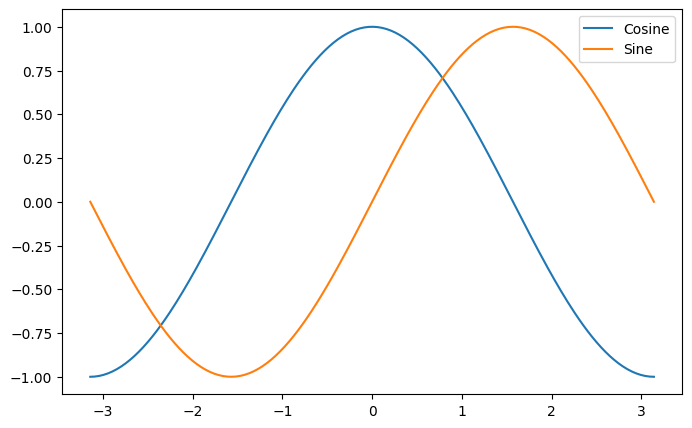

In [159]:
from matplotlib import pyplot as plt
# The first example creates a sine and a cosine and plots them.
X = np.linspace(-np.pi, np.pi, 256,endpoint=True) # Evenly spaced numbers over the specified interval
C, S = np.cos(X), np.sin(X) # Create a sine (S) and a cosine (C)

plt.figure(figsize=(8,5)) # Instantiates figure with a specified size
plt.plot(X,C, label='Cosine')
plt.plot(X,S, label='Sine')
plt.legend() # Displays legend
plt.show()

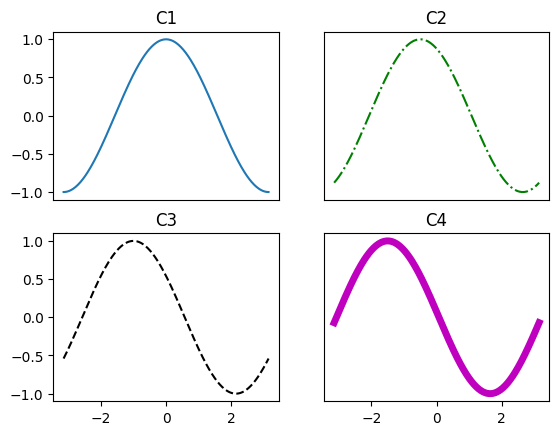

In [160]:
# Create 4 subplots and plot cosines with different colours, linestyels and linewidths.
X = np.linspace(-np.pi, np.pi, 256,endpoint=True) # Evenly spaced numbers over the specified interval
C1, C2, C3, C4 = np.cos(X), np.cos(X+0.5), np.cos(X+1.), np.cos(X+1.5)

plt.subplot(2,2,1) # 2 rows, 2 columns, this is the first plot
plt.plot(X, C1)
plt.title('C1')
plt.xticks([]) # Removes xticks

plt.subplot(2,2,2)
plt.plot(X, C2, color='green',  linestyle='-.')
plt.title('C2')
plt.xticks([]) # Removes xticks
plt.yticks([]) # Removes yticks

plt.subplot(2,2,3)
plt.plot(X, C3, color='k', linestyle='--')
plt.title('C3')

plt.subplot(2,2,4)
plt.plot(X, C4, color='m', linewidth = 5.)
plt.title('C4')
plt.yticks([]) # Removes yticks
plt.show()

Another way to reference subplots is using the Axes objects. This code acheives the same thing as above but, instead of using the package api functions, it uses the Axes object methods:

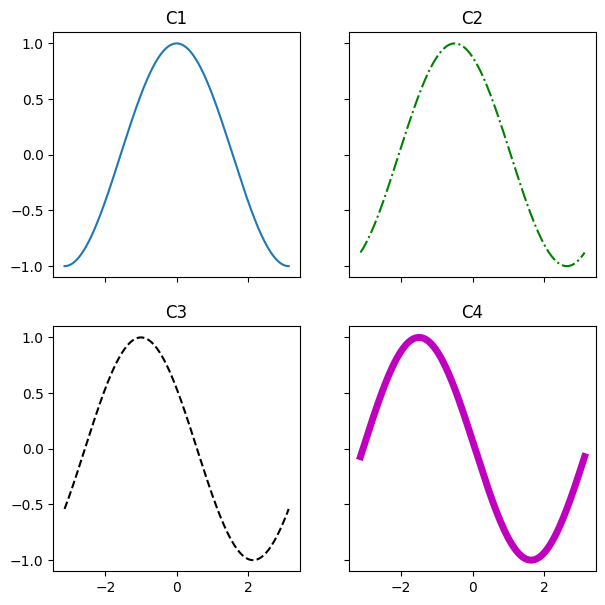

In [161]:
fig, ax = plt.subplots(2, 2, figsize=(7,7), sharex=True, sharey=True)
# ax is a 2 x 2 numpy array at this point containing the Axes objects
ax = ax.flatten()  # this simply flattens the array such that we can reference by a single index
ax[0].plot(X, C1)
ax[0].set_title('C1')
ax[1].plot(X, C2, color='green',  linestyle='-.')
ax[1].set_title('C2')
ax[2].plot(X, C3, color='k', linestyle='--')
ax[2].set_title('C3')
ax[3].plot(X, C4, color='m', linewidth = 5.)
ax[3].set_title('C4')
plt.show()

**N.B. Because we created the subplots up front and stated the axes should be the same, matplotlib intelligently labels the axes for us**

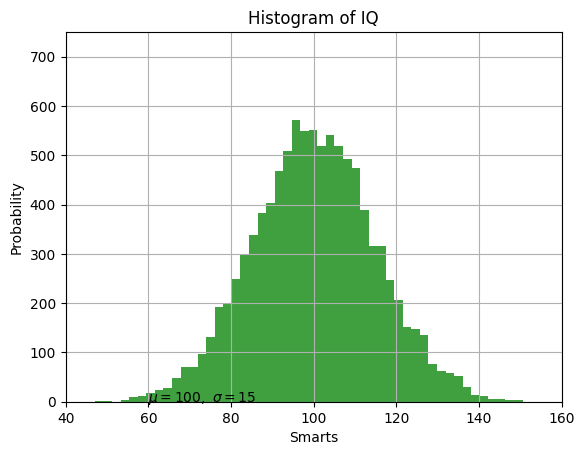

In [162]:
# Plot a histogram and add some text
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000) # Generate data from a normal distribution with mean mu and variance sigma

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75) # alpha makes it transparent

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') # Adds some text by using TeX
plt.axis([40, 160, 0, 750]) # Sets the axes limits
plt.grid(True) # Enables grid
plt.show()

## Seaborn

[Seaborn](https://seaborn.github.io/index.html) is a visualisation library built on top of matplotlib which offers some aesthetic enhancement and, more importantly, provides some high-level functions for  "exploring and understanding data". Seaborn is also tightly integrated with pandas and provides support for both numpy and pandas data structures.

### Aesthetics

Firstly note that when you import and use seaborn, it may change the aesthetics of all matplotlib plots you make subsequently. If you only ever want to use matplotlib defaults, you can import seaborn like this: `import seaborn.apionly as sns`. 

To reset to matplotlib defaults, use: `sns.reset_defaults()`

There's some really useful stuff you can do with seaborn, especially with respect to setting default sizings with respect to the context in which you're producing plots. With one function, seaborn can make plots appropriate for posters, papers, notebooks, or talks. For further information see the [seaborn documentation on aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

### Seaborn implemented functions [Optional]
The Seaborn website has many great examples. Below we show a few taken directly from the website. These are just to give you a flavour of the kinds of things that Seaborn can do. You can use it as reference later; by no means should you learn this code by heart! You should definitely not worry if some of the following commands do not make sense just yet.

In [163]:
#!pip3 install seaborn
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Load the example titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Let us first see how Seaborn can render the same visualisation in different formats, depending on intended medium (*ignore any warnings that come up*):

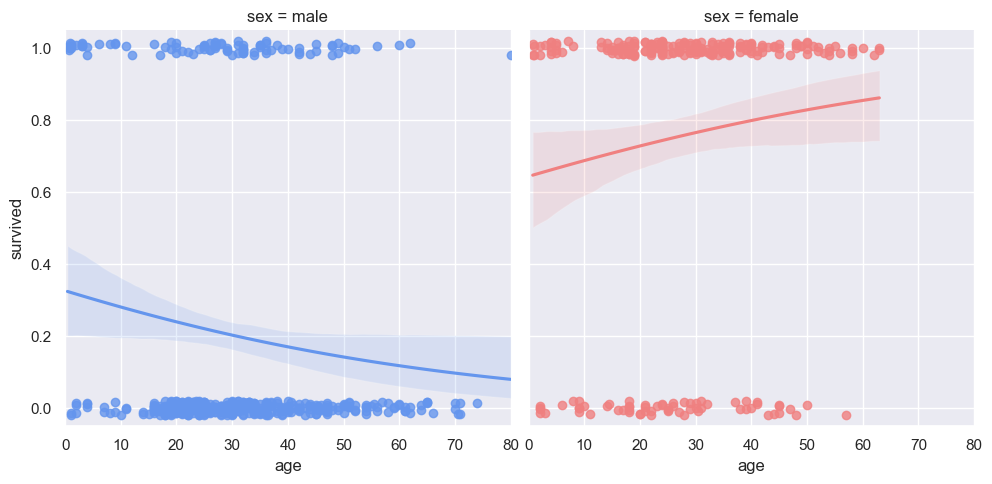

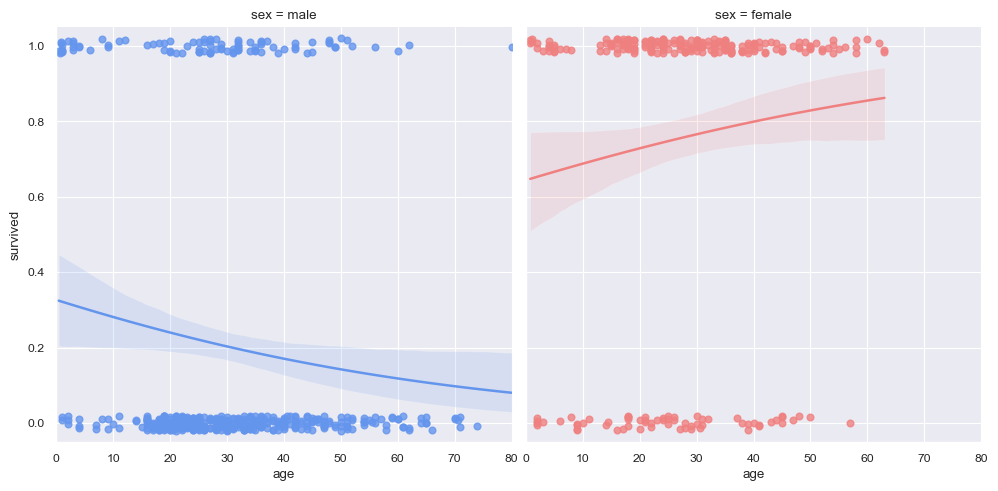

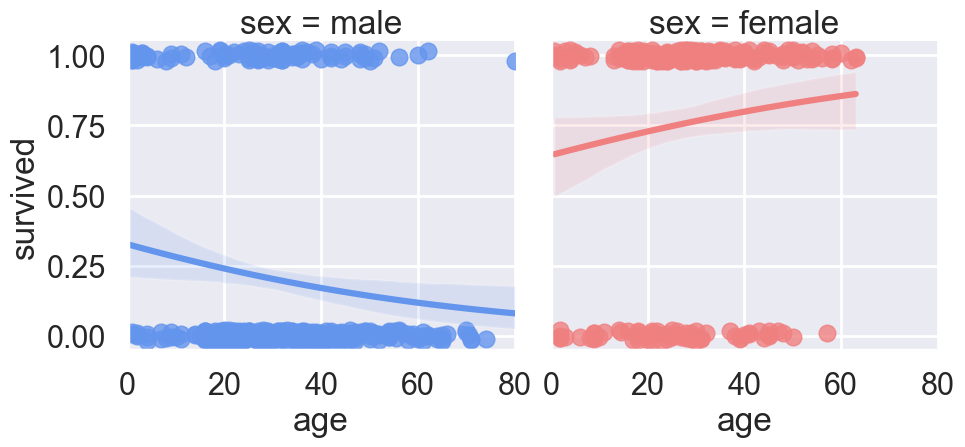

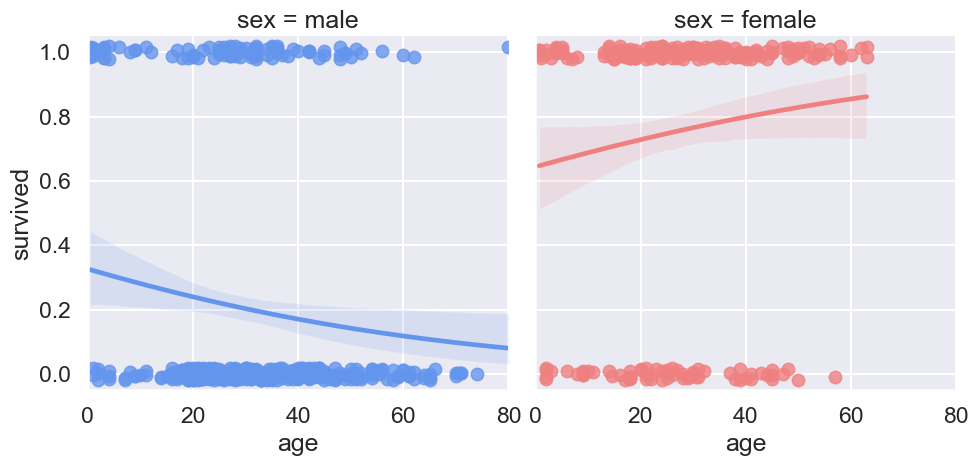

In [164]:
# Make a custom palette with gendered colors
pal = {"male":"#6495ED", "female": "#F08080"}

with sns.axes_style(style="darkgrid"):
    for context in ['notebook', 'paper', 'poster', 'talk']:
        with sns.plotting_context(context):
            # Show the survival proability as a function of age and sex
            g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
                           palette=pal, y_jitter=.02, logistic=True)
            g.set(xlim=(0, 80), ylim=(-.05, 1.05))
            plt.show()

/var/folders/7d/xjcyvs_53yn5mxdw4238pf8w0000gn/T/ipykernel_79481/1883298897.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, color="g", shade=True, ax=axes[1, 0])


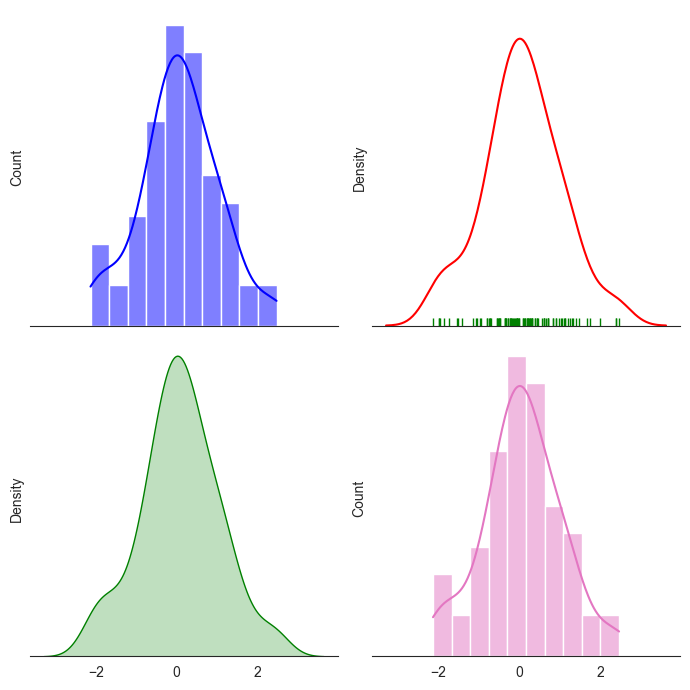

In [165]:
# using a with statement means style defaults are not overridden
with sns.axes_style(style="white", rc=dict(palette="muted", color_codes=True)):
    rs = np.random.RandomState(10)

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    # Generate a random univariate dataset
    d = rs.normal(size=100)

    # Plot a simple histogram with binsize determined automatically
    sns.histplot(d, kde=True, color="b", ax=axes[0, 0])

    # Plot a kernel density estimate and rug plot
    sns.kdeplot(data=d, color="red", ax=axes[0, 1])
    sns.rugplot(data=d, color="green", ax=axes[0, 1])
    #plots marginal distributions by drawing ticks along the x axis

    # Plot a filled kernel density estimate
    sns.kdeplot(data=d, color="g", shade=True, ax=axes[1, 0])

    # Plot a historgram and kernel density estimate
    sns.histplot(data=d, kde=True, color='tab:pink', ax=axes[1, 1])

    plt.setp(axes, yticks=[])
    plt.tight_layout()
    plt.show()

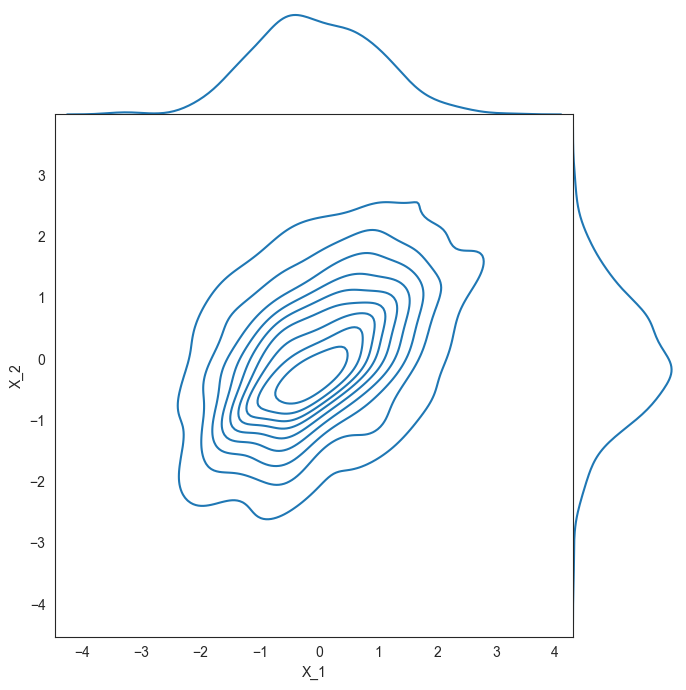

In [166]:
with sns.axes_style(style="white"):

    # Generate a random correlated bivariate dataset
    rs = np.random.RandomState(5)
    mean = [0, 0]
    cov = [(1, .5), (.5, 1)]
    x1, x2 = rs.multivariate_normal(mean, cov, 500).T
    data_df = pd.DataFrame(data=np.stack((x1,x2), axis=1), columns=["X_1", "X_2"])

    # Show the joint distribution using kernel density estimation
    g = sns.jointplot(data=data_df, x="X_1", y="X_2", kind="kde", height=7, space=0)
    plt.show()

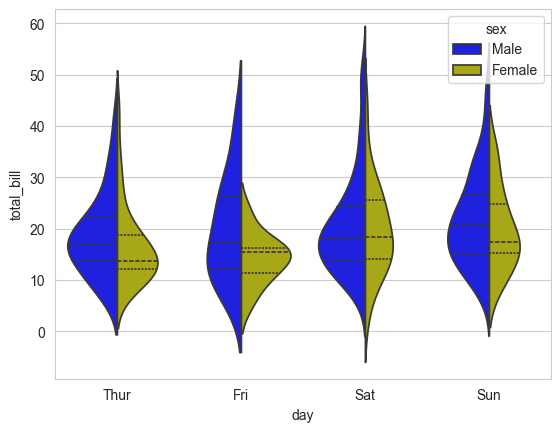

In [167]:
with sns.axes_style(style="whitegrid", rc=dict(palette="pastel", color_codes=True)):
    # Load the example tips dataset
    tips = sns.load_dataset("tips")

    # Draw a nested violinplot and split the violins for easier comparison
    sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
                   inner="quart", palette={"Male": "b", "Female": "y"})
    #sns.despine(left=True)
    plt.show()

In [168]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/var/folders/7d/xjcyvs_53yn5mxdw4238pf8w0000gn/T/ipykernel_79481/1389974708.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights_long.pivot("month", "year", "passengers")


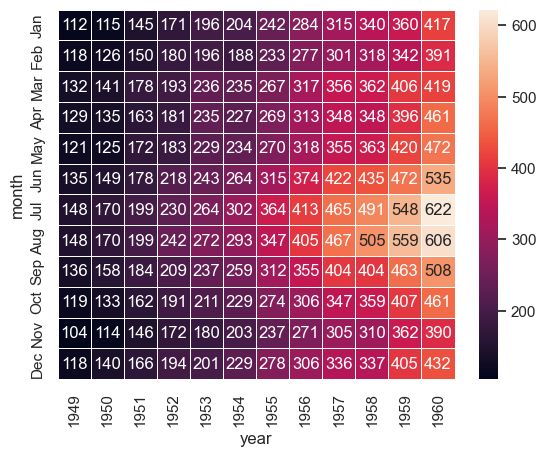

In [169]:
sns.set()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)
plt.show()

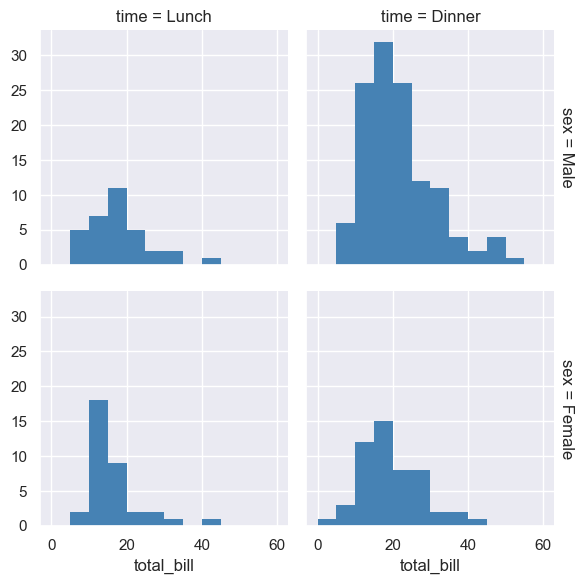

In [170]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)
plt.show()

# ======= Exercises =======

## Numpy exercises

The following short exercises test your understanding of simple numpy functions and objects. Make sure you can complete them and feel free to reference the official [documentation](http://docs.scipy.org/doc/) should you need it.

**You may need to google some solutions**

#### ========== Question 1 ==========
Print your numpy version.

In [171]:
# Your Code goes here:

np.__version__


'1.23.5'

#### ========== Question 2 ==========
Create a zero vector of size 5.

In [172]:
# Your Code goes here:

zero_vector = np.zeros(5)
zero_vector


array([0., 0., 0., 0., 0.])

#### ========== Question 3 ==========
Create a zero vector of size 5 of type integer. Set the third element to 1.

In [173]:
# Your Code goes here:

zero_vector_int = np.zeros(5, dtype=int)
zero_vector_int


array([0, 0, 0, 0, 0])

In [174]:
zero_vector_int[2] = 1
zero_vector_int

array([0, 0, 1, 0, 0])

#### ========== Question 4 ==========
Create a vector ranging from 0 to 9. 

In [175]:
# Your Code goes here:

np.arange(10)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### ========== Question 5 ==========
Create a vector ranging from 10 to 29.

In [176]:
# Your Code goes here:

np.arange(10, 30)


array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

#### ========== Question 6 ==========
Create a vector ranging from 0 to 9 and reverse it.

In [177]:
# Your Code goes here:

np.arange(10)[::-1]


array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

#### ========== Question 7 ==========
Create a 5 x 3 zero matrix.

In [178]:
# Your Code goes here:

np.zeros((5, 3))


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### ========== Question 8 ==========
Create this matrix...without copy pasting it ;)
```
array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])
```

In [179]:
# Your Code goes here:

np.arange(9).reshape(3,3).T



array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

#### ========== Question 9 ==========
Create a 3 X 3 identity matrix.

In [180]:
# Your Code goes here:

np.eye(3)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### ========== Question 10 ==========
Create a 2 X 2 X 2 array with random values (drawn from a normal distribution).

In [181]:
# Your Code goes here:

np.random.normal(size=(2, 2, 2))


array([[[ 0.91769491, -0.62981106],
        [ 1.02222434,  1.76178827]],

       [[ 0.31635201, -0.05957607],
        [-0.15728007, -0.68690125]]])

#### ========== Question 11a ==========
Create a 5 x 4 array with random values and find the minimum and maximum values.

In [182]:
# Your Code goes here:

array_5x4 = np.random.rand(5, 4)
array_5x4

array([[0.40135289, 0.72570895, 0.71582071, 0.7340754 ],
       [0.57252907, 0.22064508, 0.78312211, 0.54652907],
       [0.71051561, 0.47571855, 0.14382418, 0.74978792],
       [0.98443446, 0.88980386, 0.22397551, 0.34297225],
       [0.35383926, 0.79778565, 0.07700229, 0.26776044]])

In [183]:
array_5x4.min()

0.07700229245407852

In [184]:
array_5x4.max()

0.9844344609404082

#### ========== Question 11b ==========
Return the *index* (i.e. the location within the matrix) of the max or min values

In [185]:
# Your Code goes here:

min_index = np.unravel_index(array_5x4.argmin(), array_5x4.shape)
max_index = np.unravel_index(array_5x4.argmax(), array_5x4.shape)

min_index, max_index

((4, 2), (3, 0))

#### ========== Question 12 ==========
Find the mean value of the array in 11.

In [186]:
# Your Code goes here:

array_5x4.mean()


0.535860162543568

#### ========== Question 13 ==========
Find the row means of the array in 11.

In [187]:
# Your Code goes here:

array_5x4.mean(axis=1)


array([0.64423949, 0.53070633, 0.51996157, 0.61029652, 0.37409691])

#### ========== Question 14 ==========
Find the column means of the array in 11.

In [188]:
# Your Code goes here:

array_5x4.mean(axis=0)


array([0.60453426, 0.62193242, 0.38874896, 0.52822502])

#### ========== Question 15 ==========
Create a list with elements 2.2, 3.5, 0, 4, 0. and convert into numpy array. Find the indices of non-zero elements.

In [189]:
# Your Code goes here:

list_with_elements = [2.2, 3.5, 0, 4, 0.]
numpy_array = np.array(list_with_elements)
non_zero_indices = np.nonzero(numpy_array)
non_zero_indices

(array([0, 1, 3]),)

#### ========== Question 16 ==========
Crate two normally distributed random matrices of shape (5, 4) and (4, 2). Print their matrix product.

In [190]:
# Your Code goes here:

matrix1 = np.random.randn(5, 4)
matrix2 = np.random.randn(4, 2)
matrix_product = np.dot(matrix1, matrix2)


#### ========== Question 17 ==========
Crate a random matrix of shape (5, 3) and a random vector of size 3. Use broadcasting to add the two arrays.

In [191]:
# Your Code goes here:

random_matrix = np.random.rand(5, 3)
random_vector = np.random.rand(3)
result_with_broadcasting = random_matrix + random_vector


## Pandas exercises

#### ========== Question 18 ==========
Load the `credit` dataset and display the dataset basic information.

In [192]:
# Your Code goes here:

cs_df = pd.read_csv('credit_score.csv')
cs_df.info()


/var/folders/7d/xjcyvs_53yn5mxdw4238pf8w0000gn/T/ipykernel_79481/2571009069.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  cs_df = pd.read_csv('credit_score.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#### ========== Question 19 ==========
Display the summary statistics of the features of the dataset.

In [193]:
# Your Code goes here:

cs_df.describe()


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


#### ========== Question 20 ==========
Display the last 6 instances of the dataset.

In [194]:
# Your Code goes here:

cs_df.tail(6)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6,9.5,3.0,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


#### ========== Question 21 ==========
Print the 5th observation

In [195]:
# Your Code goes here:

cs_df.iloc[4]


ID                                                                     0x1606
Customer_ID                                                         CUS_0xd40
Month                                                                     May
Name                                                            Aaron Maashoh
Age                                                                        23
SSN                                                               821-00-0265
Occupation                                                          Scientist
Annual_Income                                                        19114.12
Monthly_Inhand_Salary                                             1824.843333
Num_Bank_Accounts                                                           3
Num_Credit_Card                                                             4
Interest_Rate                                                               3
Num_of_Loan                                                     

#### ========== Question 22 ==========
Print the standard deviation of the feature `Credit_Utilization_Ratio` by using the numpy method `std`. You can verify you get the correct result by inspecting the statistics table from Question 19.

In [196]:
# Your Code goes here:

np.std(cs_df['Credit_Utilization_Ratio'])

# its 5.116875 in q 19


5.116849485711594

In [197]:
np.std(cs_df['Credit_Utilization_Ratio'], ddof=1)

# to match pandas default behavior
# pandas use ddof = 1 by default
# numpy use ddof = 0 by default
# ddof = delta degrees of freedom
# N - ddof is used for division


5.116875070150906

## Matplotlib exercises

#### ========== Question 23 ==========
Initialise an empty figure of size (8,6). Create a scatter plot of the observations in the `credit` dataset for the features `Credit_Utilization_Ratio` and `Age` (age should be shown on the xaxis). Use black coloured markers. Label the axes accordingly by using red colour for the xaxis and green for the yaxis. Finally, add a title of your choice by using a font size of 20. 

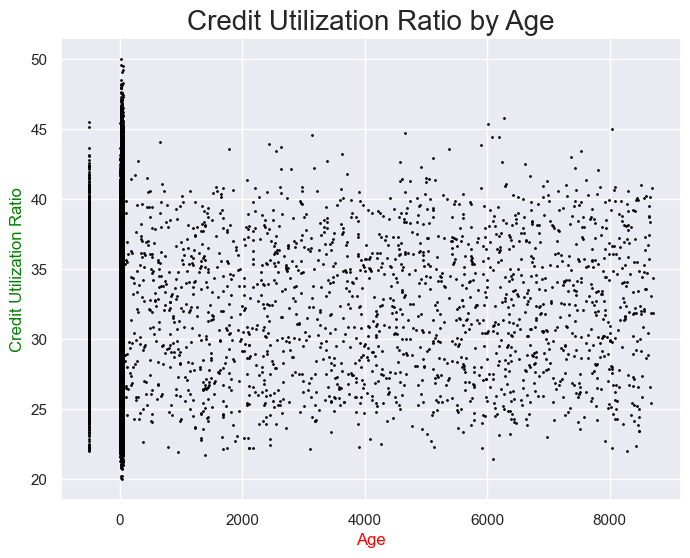

Minimum Age: -500.0
Maximum Age: 8698.0
Minimum Credit Score: 20.0
Maximum Credit Score: 50.00000000000001


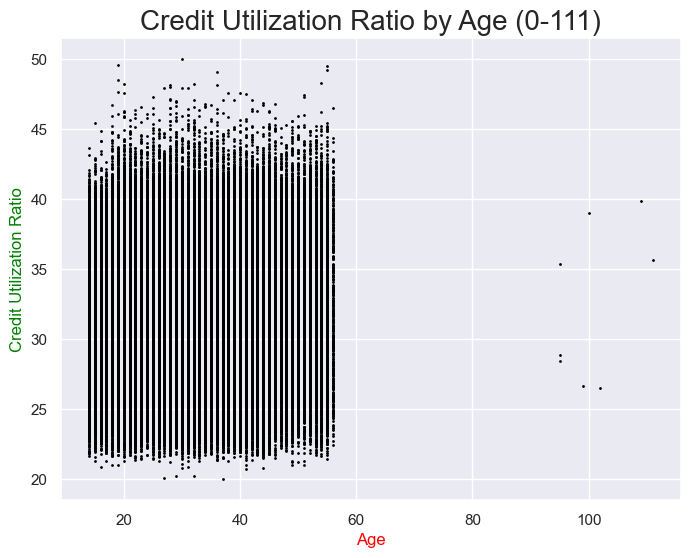

Minimum Age: 14.0
Maximum Age: 111.0
Minimum Credit Score: 20.0
Maximum Credit Score: 50.00000000000001


In [198]:
# Your Code goes here:

# this is needed because the column is not numeric
cs_df['Age'] = pd.to_numeric(cs_df['Age'], errors='coerce')

plt.figure(figsize=(8, 6))
plt.scatter(cs_df['Age'], cs_df['Credit_Utilization_Ratio'], color='black', s=1)
plt.xlabel('Age', color='red')
plt.ylabel('Credit Utilization Ratio', color='green')
plt.title('Credit Utilization Ratio by Age', fontsize=20)
plt.show()

min_age = cs_df['Age'].min()
max_age = cs_df['Age'].max()
min_credit_score = cs_df['Credit_Utilization_Ratio'].min()
max_credit_score = cs_df['Credit_Utilization_Ratio'].max()
print("Minimum Age:", min_age)
print("Maximum Age:", max_age)
print("Minimum Credit Score:", min_credit_score)
print("Maximum Credit Score:", max_credit_score)

filtered_cs_df = cs_df[(cs_df['Age'] > 0) & (cs_df['Age'] <= 111)]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_cs_df['Age'], filtered_cs_df['Credit_Utilization_Ratio'], color='black', s = 1)
plt.xlabel('Age', color='red')
plt.ylabel('Credit Utilization Ratio', color='green')
plt.title('Credit Utilization Ratio by Age (0-111)', fontsize=20)
plt.show()

min_age = filtered_cs_df['Age'].min()
max_age = filtered_cs_df['Age'].max()
min_credit_score = filtered_cs_df['Credit_Utilization_Ratio'].min()
max_credit_score = filtered_cs_df['Credit_Utilization_Ratio'].max()
print("Minimum Age:", min_age)
print("Maximum Age:", max_age)
print("Minimum Credit Score:", min_credit_score)
print("Maximum Credit Score:", max_credit_score)


#### ========== Question 24 ==========
You should note above that there is an outlier (i.e. an observation that is very distant to the other observations). Now you think that there must be something wrong with that observation (why?) and as a next step you should remove it from both the age and duration variables and a make a scatter plot of the new data.

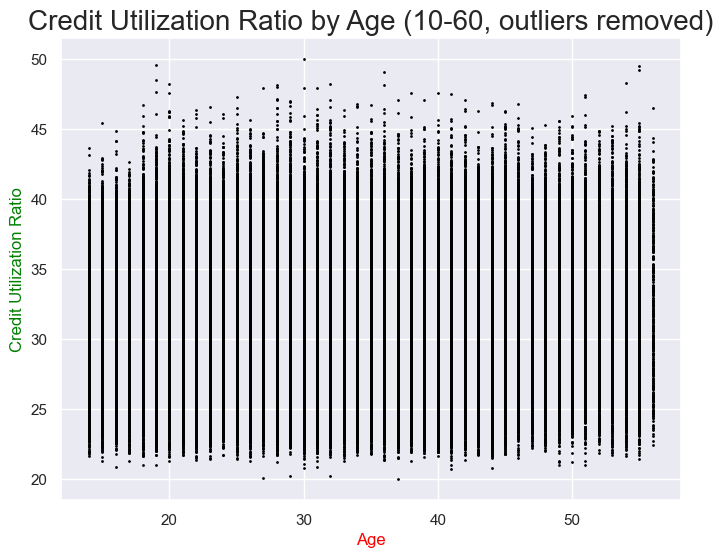

In [199]:

filtered_cs_df_outliers_removed = cs_df[(cs_df['Age'] >= 10) & (cs_df['Age'] <= 60)]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_cs_df_outliers_removed['Age'], filtered_cs_df_outliers_removed['Credit_Utilization_Ratio'], color='black', s = 1)
plt.xlabel('Age', color='red')
plt.ylabel('Credit Utilization Ratio', color='green')
plt.title('Credit Utilization Ratio by Age (10-60, outliers removed)', fontsize=20)
plt.show()
